In [1]:
include("load_data.jl")

In [2]:
include("../../calculations/multistate-op/script.jl")

gen_model (generic function with 1 method)

In [3]:
import NaCsCalc.Format: Unc

In [4]:
using PyPlot
matplotlib["rcParams"][:update](Dict("font.size" => 20,
                                     "font.weight" => "bold"))
matplotlib[:rc]("xtick", labelsize=15)
matplotlib[:rc]("ytick", labelsize=15)

In [5]:
using LsqFit

In [6]:
function gen_fit_model(rates)
    f = gen_model(rates, Float64[1, 0, 0, 0, 0, 0, 0, 0])
    function (x, p)
        p[1] .* f.(x .* p[2])
    end
end

gen_fit_model (generic function with 1 method)

In [7]:
function fit_and_plot_op(rates, ts, ratios, uncs)
    model = gen_fit_model(rates)
    init = Float64[1, 0, 0, 0, 0, 0, 0, 0]
    init_f1 = Float64[0, 0, 0, 0, 0, 1, 0, 0]
    r = sum(rates * init)
    r_f1 = sum(rates * init_f1)
    τ = 1 / r
    τ_f1 = 1 / r_f1
    τ_max = max(τ, τ_f1)
    tmax = maximum(ts)
    pinit = [1.0, 10τ_max / tmax]
    fit = curve_fit(model, ts, ratios, pinit)
    plot_ts = linspace(0, tmax, 1000)
    ys = model(plot_ts, fit.param)
    plot(plot_ts, ys, color="orange")
    errorbar(ts, ratios, uncs, fmt="bo")
    grid()
    ylim(0, ylim()[2])
    xlim(0, xlim()[2])
    xlabel("\$t (ms)\$")
    nrm, tscale = fit.param
    nrm_s, tscale_s = estimate_errors(fit)
    τ_f1_real = τ_f1 / tscale
    τ_f1_real_s = tscale_s / tscale * τ_f1_real
    τ_f2_real = τ / tscale
    τ_f2_real_s = tscale_s / tscale * τ_f2_real
    return (Unc(nrm, nrm_s), Unc(tscale, tscale_s),
            Unc(τ_f1_real, τ_f1_real_s), Unc(τ_f2_real, τ_f2_real_s))
end

fit_and_plot_op (generic function with 1 method)

fit_and_plot_op(rates_f1_coprop, params_f1_coprop, ratios_f1_coprop, uncs_f1_coprop) = (0.956(40), 4.46(63)e5, 5.44(77), 4.73(67))

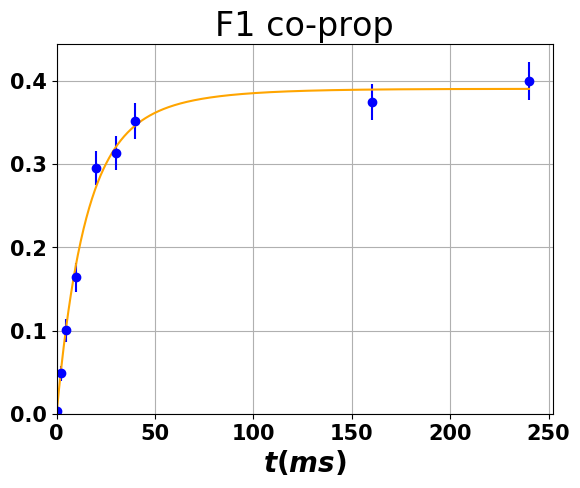

In [8]:
@show fit_and_plot_op(rates_f1_coprop, params_f1_coprop, ratios_f1_coprop, uncs_f1_coprop)
title("F1 co-prop")
savefig("imgs/fit_f1_coprop.svg", bbox_inches="tight", transparent=true)
savefig("imgs/fit_f1_coprop.png", bbox_inches="tight", transparent=true)

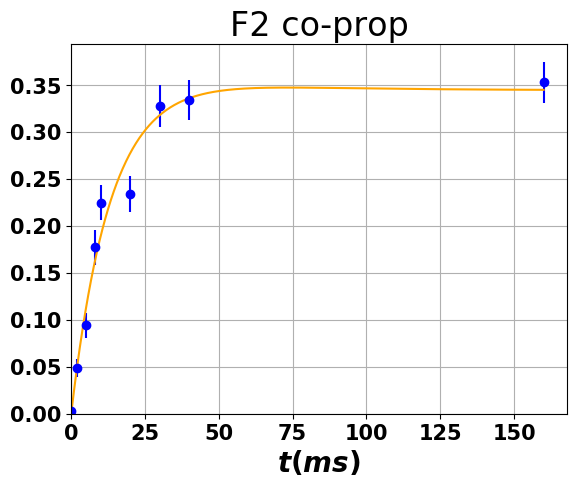

fit_and_plot_op(rates_f2_coprop, params_f2_coprop, ratios_f2_coprop, uncs_f2_coprop) = (0.849(79), 4.1(10)e5, 6.7(17), 5.9(15))


In [9]:
@show fit_and_plot_op(rates_f2_coprop, params_f2_coprop, ratios_f2_coprop, uncs_f2_coprop)
title("F2 co-prop")
savefig("imgs/fit_f2_coprop.svg", bbox_inches="tight", transparent=true)
savefig("imgs/fit_f2_coprop.png", bbox_inches="tight", transparent=true)

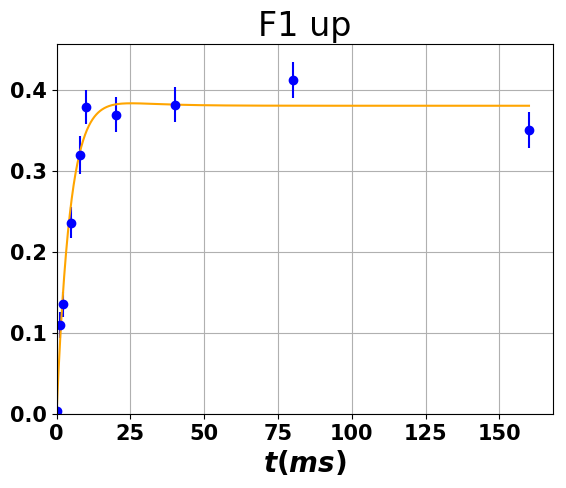

fit_and_plot_op(rates_f1_up, params_f1_up, ratios_f1_up, uncs_f1_up) = (0.932(54), 1.05(23)e6, 2.32(52), 2.02(45))


In [10]:
@show fit_and_plot_op(rates_f1_up, params_f1_up, ratios_f1_up, uncs_f1_up)
title("F1 up")
savefig("imgs/fit_f1_up.svg", bbox_inches="tight", transparent=true)
savefig("imgs/fit_f1_up.png", bbox_inches="tight", transparent=true)

fit_and_plot_op(rates_f1_down, params_f1_down, ratios_f1_down, uncs_f1_down) = (0.972(47), 8.2(13)e5, 2.95(46), 2.56(40))

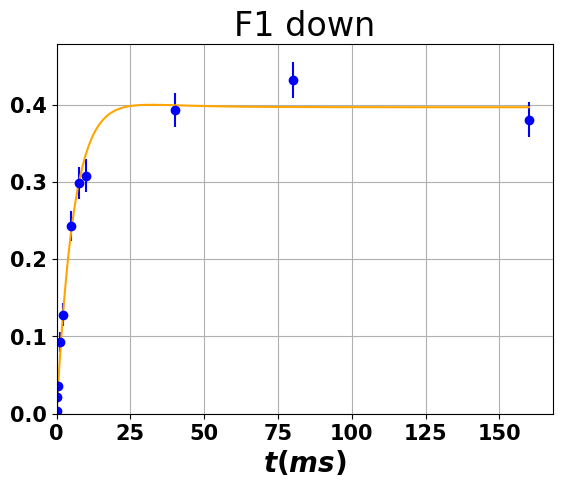

In [11]:
@show fit_and_plot_op(rates_f1_down, params_f1_down, ratios_f1_down, uncs_f1_down)
title("F1 down")
savefig("imgs/fit_f1_down.svg", bbox_inches="tight", transparent=true)
savefig("imgs/fit_f1_down.png", bbox_inches="tight", transparent=true)

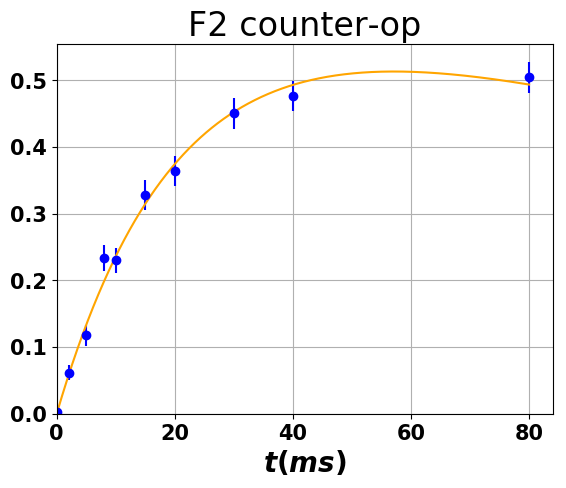

fit_and_plot_op(rates_f2_counterop, params_f2_counterop, ratios_f2_counterop, uncs_f2_counterop) = (1.008(40), 3.25(28)e5, 7.11(62), 12.5(11))


In [12]:
@show fit_and_plot_op(rates_f2_counterop, params_f2_counterop, ratios_f2_counterop, uncs_f2_counterop)
title("F2 counter-op")
savefig("imgs/fit_f2_counterop.svg", bbox_inches="tight", transparent=true)
savefig("imgs/fit_f2_counterop.png", bbox_inches="tight", transparent=true)